## Comparing Housing Market "Hotness": Dallas vs Austin

In [61]:
# Import dependencies
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [62]:
# Load the csv file
austin_dallas_housing_df = pd.read_csv("newdata.csv",encoding='utf-8')
austin_dallas_housing_df.head(10)


,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Austin,Texas,Feb-12,$190K,5.60%,2.20%,"1,403",18.60%,16.60%,"2,569",...,10.40%,"6,941",1.20%,-21.50%,74,0,-18,96.70%,0.40%,0.10%
1,Austin,Texas,Mar-12,$200K,5.10%,8.70%,"2,076",48.00%,18.60%,"3,400",...,-3.00%,"7,394",6.50%,-23.10%,58,-16,-26,97.30%,0.60%,0.90%
2,Austin,Texas,Apr-12,$205K,2.70%,7.90%,"2,120",2.10%,14.80%,"3,379",...,1.40%,"7,698",4.10%,-24.00%,39,-19,-21,97.70%,0.40%,1.00%
3,Austin,Texas,May-12,$210K,2.40%,9.10%,"2,584",21.90%,25.10%,"3,493",...,11.80%,"7,908",2.70%,-22.50%,36,-3,-18,97.60%,0.00%,1.00%
4,Austin,Texas,Jun-12,$214K,2.00%,8.70%,"2,842",10.00%,21.00%,"3,396",...,8.80%,"8,152",3.10%,-20.30%,31,-5,-21,97.80%,0.20%,1.10%
5,Austin,Texas,Jul-12,$210K,-1.90%,10.20%,"2,586",-9.00%,20.30%,"2,939",...,7.20%,"8,068",-1.00%,-18.70%,34,3,-21,97.80%,-0.10%,0.90%
6,Austin,Texas,Aug-12,$209K,-0.50%,8.60%,"2,585",0.00%,17.50%,"2,709",...,15.80%,"7,669",-4.90%,-17.60%,38,4,-23,97.60%,-0.10%,1.00%
7,Austin,Texas,Sep-12,$197K,-6.00%,5.10%,"1,991",-23.00%,10.90%,"2,107",...,1.50%,"7,250",-5.50%,-16.50%,43,5,-20,97.40%,-0.20%,0.90%
8,Austin,Texas,Oct-12,$199K,1.40%,5.40%,"2,157",8.30%,38.70%,"2,234",...,6.90%,"6,773",-6.60%,-18.30%,50,7,-16,97.20%,-0.20%,0.50%
9,Austin,Texas,Nov-12,$199K,0.00%,7.70%,"1,812",-16.00%,23.60%,"1,933",...,10.40%,"6,236",-7.90%,-18.60%,48,-2,-22,97.30%,0.10%,0.60%


In [63]:
#Show data counts
austin_dallas_housing_df.count()

City                         262
State                        262
Month of Period End          262
Median Sale Price            262
Median Sale Price MoM        262
Median Sale Price YoY        262
Homes Sold                   262
Homes Sold MoM               262
Homes Sold YoY               262
New Listings                 262
New Listings MoM             262
New Listings YoY             262
Inventory                    262
Inventory MoM                262
 Inventory YoY               262
Days on Market               262
Days on Market MoM           262
Days on Market YoY           262
Average Sale To List         262
Average Sale To List MoM     262
Average Sale To List YoY     262
dtype: int64

In [64]:
#Trying to separate austin and dallas information
austin_data = austin_dallas_housing_df.loc[austin_dallas_housing_df["City"] == "Austin"]
austin_data

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Austin,Texas,Feb-12,$190K,5.60%,2.20%,"1,403",18.60%,16.60%,"2,569",...,10.40%,"6,941",1.20%,-21.50%,74,0,-18,96.70%,0.40%,0.10%
1,Austin,Texas,Mar-12,$200K,5.10%,8.70%,"2,076",48.00%,18.60%,"3,400",...,-3.00%,"7,394",6.50%,-23.10%,58,-16,-26,97.30%,0.60%,0.90%
2,Austin,Texas,Apr-12,$205K,2.70%,7.90%,"2,120",2.10%,14.80%,"3,379",...,1.40%,"7,698",4.10%,-24.00%,39,-19,-21,97.70%,0.40%,1.00%
3,Austin,Texas,May-12,$210K,2.40%,9.10%,"2,584",21.90%,25.10%,"3,493",...,11.80%,"7,908",2.70%,-22.50%,36,-3,-18,97.60%,0.00%,1.00%
4,Austin,Texas,Jun-12,$214K,2.00%,8.70%,"2,842",10.00%,21.00%,"3,396",...,8.80%,"8,152",3.10%,-20.30%,31,-5,-21,97.80%,0.20%,1.10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Austin,Texas,Aug-22,$500K,-3.80%,5.50%,"2,872",3.10%,-24.00%,"3,672",...,-14.90%,"10,739",-0.20%,77.90%,40,6,10,98.90%,-1.30%,-5.10%
127,Austin,Texas,Sep-22,$475K,-5.00%,5.60%,"2,880",0.30%,-21.10%,"3,528",...,-11.50%,"10,827",0.80%,77.30%,47,7,15,98.30%,-0.60%,-3.90%
128,Austin,Texas,Oct-22,$475K,0.00%,3.70%,"2,235",-22.40%,-29.60%,"2,739",...,-26.10%,"10,291",-5.00%,70.30%,53,6,19,97.30%,-1.00%,-4.40%
129,Austin,Texas,Nov-22,$470K,-1.10%,-0.20%,"1,986",-11.10%,-38.30%,"2,015",...,-30.50%,"9,132",-11.30%,77.30%,61,8,26,96.50%,-0.90%,-4.80%


In [65]:
#Dallas information
dallas_data = austin_dallas_housing_df.loc[austin_dallas_housing_df["City"] == "Dallas"]
dallas_data

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
131,Dallas,Texas,Feb-12,$160K,4.70%,1.30%,"2,998",20.80%,22.80%,"5,533",...,15.70%,"17,066",4.20%,-22.90%,83,-2,-15,96.40%,0.20%,0.20%
132,Dallas,Texas,Mar-12,$168K,4.70%,8.80%,"3,979",32.70%,12.60%,"6,607",...,-5.30%,"17,862",4.70%,-22.80%,63,-20,-24,96.60%,0.30%,0.60%
133,Dallas,Texas,Apr-12,$169K,0.90%,5.80%,"4,202",5.60%,13.70%,"6,303",...,-4.90%,"18,194",1.90%,-23.60%,49,-14,-23,97.00%,0.40%,0.90%
134,Dallas,Texas,May-12,$178K,5.30%,7.80%,"4,919",17.10%,23.10%,"6,437",...,8.50%,"18,225",0.20%,-22.90%,49,0,-21,97.10%,0.10%,0.80%
135,Dallas,Texas,Jun-12,$180K,1.20%,8.40%,"5,089",3.50%,13.80%,"6,227",...,0.10%,"18,412",1.00%,-22.00%,49,0,-21,97.40%,0.30%,1.10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Dallas,Texas,Aug-22,$430K,-1.10%,13.90%,"6,128",6.90%,-11.50%,"6,879",...,-7.10%,"13,765",-2.70%,47.50%,25,6,7,99.70%,-1.80%,-2.70%
258,Dallas,Texas,Sep-22,$420K,-2.30%,12.00%,"5,450",-11.10%,-17.90%,"6,459",...,-4.70%,"13,887",0.90%,54.60%,32,7,11,98.70%,-1.00%,-2.80%
259,Dallas,Texas,Oct-22,$420K,0.00%,11.10%,"4,573",-16.10%,-26.30%,"5,564",...,-9.30%,"13,714",-1.20%,67.80%,33,1,11,98.50%,-0.20%,-2.80%
260,Dallas,Texas,Nov-22,$410K,-2.40%,8.30%,"4,064",-11.10%,-30.50%,"4,439",...,-14.10%,"12,697",-7.40%,83.90%,37,4,16,97.90%,-0.60%,-3.60%


In [66]:
#Check data types for each column
austin_data.dtypes

City                         object
State                        object
Month of Period End          object
Median Sale Price            object
Median Sale Price MoM        object
Median Sale Price YoY        object
Homes Sold                   object
Homes Sold MoM               object
Homes Sold YoY               object
New Listings                 object
New Listings MoM             object
New Listings YoY             object
Inventory                    object
Inventory MoM                object
 Inventory YoY               object
Days on Market                int64
Days on Market MoM            int64
Days on Market YoY            int64
Average Sale To List         object
Average Sale To List MoM     object
Average Sale To List YoY     object
dtype: object

In [67]:
austin_data["Median Sale Price"] = austin_data["Median Sale Price"].str.replace("$", "")
austin_data["Median Sale Price"] = austin_data["Median Sale Price"].str.replace("K", "")
austin_data["Median Sale Price"] = austin_data["Median Sale Price"].astype(float)
austin_data.head()


,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Austin,Texas,Feb-12,190.0,5.60%,2.20%,"1,403",18.60%,16.60%,"2,569",...,10.40%,"6,941",1.20%,-21.50%,74,0,-18,96.70%,0.40%,0.10%
1,Austin,Texas,Mar-12,200.0,5.10%,8.70%,"2,076",48.00%,18.60%,"3,400",...,-3.00%,"7,394",6.50%,-23.10%,58,-16,-26,97.30%,0.60%,0.90%
2,Austin,Texas,Apr-12,205.0,2.70%,7.90%,"2,120",2.10%,14.80%,"3,379",...,1.40%,"7,698",4.10%,-24.00%,39,-19,-21,97.70%,0.40%,1.00%
3,Austin,Texas,May-12,210.0,2.40%,9.10%,"2,584",21.90%,25.10%,"3,493",...,11.80%,"7,908",2.70%,-22.50%,36,-3,-18,97.60%,0.00%,1.00%
4,Austin,Texas,Jun-12,214.0,2.00%,8.70%,"2,842",10.00%,21.00%,"3,396",...,8.80%,"8,152",3.10%,-20.30%,31,-5,-21,97.80%,0.20%,1.10%


In [68]:
dallas_data["Median Sale Price"] = dallas_data["Median Sale Price"].str.replace("$", "")
dallas_data["Median Sale Price"] = dallas_data["Median Sale Price"].str.replace("K", "")
dallas_data["Median Sale Price"] = dallas_data["Median Sale Price"].astype(float)
dallas_data.head()

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
131,Dallas,Texas,Feb-12,160.0,4.70%,1.30%,"2,998",20.80%,22.80%,"5,533",...,15.70%,"17,066",4.20%,-22.90%,83,-2,-15,96.40%,0.20%,0.20%
132,Dallas,Texas,Mar-12,168.0,4.70%,8.80%,"3,979",32.70%,12.60%,"6,607",...,-5.30%,"17,862",4.70%,-22.80%,63,-20,-24,96.60%,0.30%,0.60%
133,Dallas,Texas,Apr-12,169.0,0.90%,5.80%,"4,202",5.60%,13.70%,"6,303",...,-4.90%,"18,194",1.90%,-23.60%,49,-14,-23,97.00%,0.40%,0.90%
134,Dallas,Texas,May-12,178.0,5.30%,7.80%,"4,919",17.10%,23.10%,"6,437",...,8.50%,"18,225",0.20%,-22.90%,49,0,-21,97.10%,0.10%,0.80%
135,Dallas,Texas,Jun-12,180.0,1.20%,8.40%,"5,089",3.50%,13.80%,"6,227",...,0.10%,"18,412",1.00%,-22.00%,49,0,-21,97.40%,0.30%,1.10%


In [89]:
austin_2018_2022 = austin_data.iloc[71:131]
austin_2018_2022

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
71,Austin,Texas,Jan-18,291.0,-4.60%,4.10%,"1,845",-37.70%,8.30%,"2,523",...,-4.90%,"5,921",-5.70%,3.60%,48,-5,5,97.90%,0.00%,-0.20%
72,Austin,Texas,Feb-18,295.0,1.40%,2.10%,"2,239",21.40%,7.00%,"3,149",...,2.00%,"6,172",4.20%,2.10%,52,4,10,98.20%,0.30%,-0.10%
73,Austin,Texas,Mar-18,300.0,1.70%,1.70%,"3,032",35.40%,9.10%,"4,235",...,-2.30%,"6,850",11.00%,-0.20%,31,-21,8,98.50%,0.30%,0.00%
74,Austin,Texas,Apr-18,315.0,5.00%,4.70%,"2,996",-1.20%,6.60%,"4,432",...,5.20%,"7,419",8.30%,-0.90%,21,-10,4,98.80%,0.30%,-0.10%
75,Austin,Texas,May-18,318.0,1.00%,4.20%,"3,658",22.10%,6.00%,"4,686",...,2.70%,"8,135",9.70%,1.80%,20,-1,1,98.80%,0.00%,0.10%
76,Austin,Texas,Jun-18,321.0,0.90%,4.30%,"3,721",1.70%,-1.60%,"4,328",...,-3.40%,"8,646",6.30%,0.00%,22,2,0,98.80%,0.00%,0.10%
77,Austin,Texas,Jul-18,315.0,-1.90%,5.70%,"3,473",-6.70%,6.90%,"3,855",...,-1.70%,"8,760",1.30%,-1.90%,26,4,4,98.60%,-0.20%,0.10%
78,Austin,Texas,Aug-18,317.0,0.60%,7.40%,"3,357",-3.30%,2.60%,"3,850",...,15.30%,"8,959",2.30%,1.90%,32,6,3,98.30%,-0.30%,0.00%
79,Austin,Texas,Sep-18,300.0,-5.30%,3.80%,"2,607",-22.30%,-2.80%,"2,856",...,1.00%,"8,809",-1.70%,4.90%,35,3,0,98.10%,-0.20%,0.00%
80,Austin,Texas,Oct-18,305.0,1.70%,5.30%,"2,604",-0.10%,4.30%,"2,888",...,1.80%,"8,473",-3.80%,7.50%,43,8,2,98.10%,-0.10%,0.00%


In [90]:
dallas_2018_2022 =dallas_data.iloc[71:131]
dallas_2018_2022

,City,State,Month of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,...,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
202,Dallas,Texas,Jan-18,264.0,-5.90%,5.40%,"3,669",-33.50%,3.80%,"5,839",...,4.70%,"12,167",3.30%,12.30%,46,1,8,97.90%,0.00%,-0.30%
203,Dallas,Texas,Feb-18,280.0,6.30%,5.30%,"4,343",18.40%,5.00%,"6,032",...,-0.50%,"12,585",3.40%,10.70%,40,-6,5,98.30%,0.40%,-0.10%
204,Dallas,Texas,Mar-18,289.0,3.20%,5.10%,"5,687",30.90%,-0.70%,"7,967",...,-2.40%,"13,953",10.90%,10.30%,31,-9,4,98.50%,0.20%,-0.40%
205,Dallas,Texas,Apr-18,285.0,-1.40%,1.80%,"5,678",-0.20%,3.50%,"8,477",...,16.00%,"15,214",9.00%,15.20%,28,-3,4,98.80%,0.30%,-0.50%
206,Dallas,Texas,May-18,295.0,3.50%,1.70%,"6,702",18.00%,1.50%,"8,961",...,6.20%,"16,659",9.50%,17.60%,28,0,3,98.80%,0.00%,-0.50%
207,Dallas,Texas,Jun-18,300.0,1.70%,3.40%,"6,775",1.10%,-1.10%,"9,042",...,4.80%,"18,265",9.60%,17.40%,29,1,3,98.70%,-0.10%,-0.50%
208,Dallas,Texas,Jul-18,295.0,-1.70%,5.00%,"6,361",-6.10%,2.40%,"7,951",...,1.90%,"18,622",2.00%,16.10%,32,3,5,98.50%,-0.20%,-0.60%
209,Dallas,Texas,Aug-18,289.0,-2.10%,3.80%,"6,407",0.70%,-3.00%,"7,424",...,0.70%,"18,648",0.10%,16.60%,37,5,7,98.20%,-0.30%,-0.60%
210,Dallas,Texas,Sep-18,280.0,-3.00%,3.70%,"4,902",-23.50%,-10.20%,"6,193",...,-3.20%,"18,616",-0.20%,17.00%,40,3,6,98.20%,0.00%,-0.30%
211,Dallas,Texas,Oct-18,275.0,-1.80%,0.00%,"4,948",0.90%,-3.10%,"6,221",...,3.50%,"18,333",-1.50%,19.30%,45,5,7,98.00%,-0.20%,-0.20%


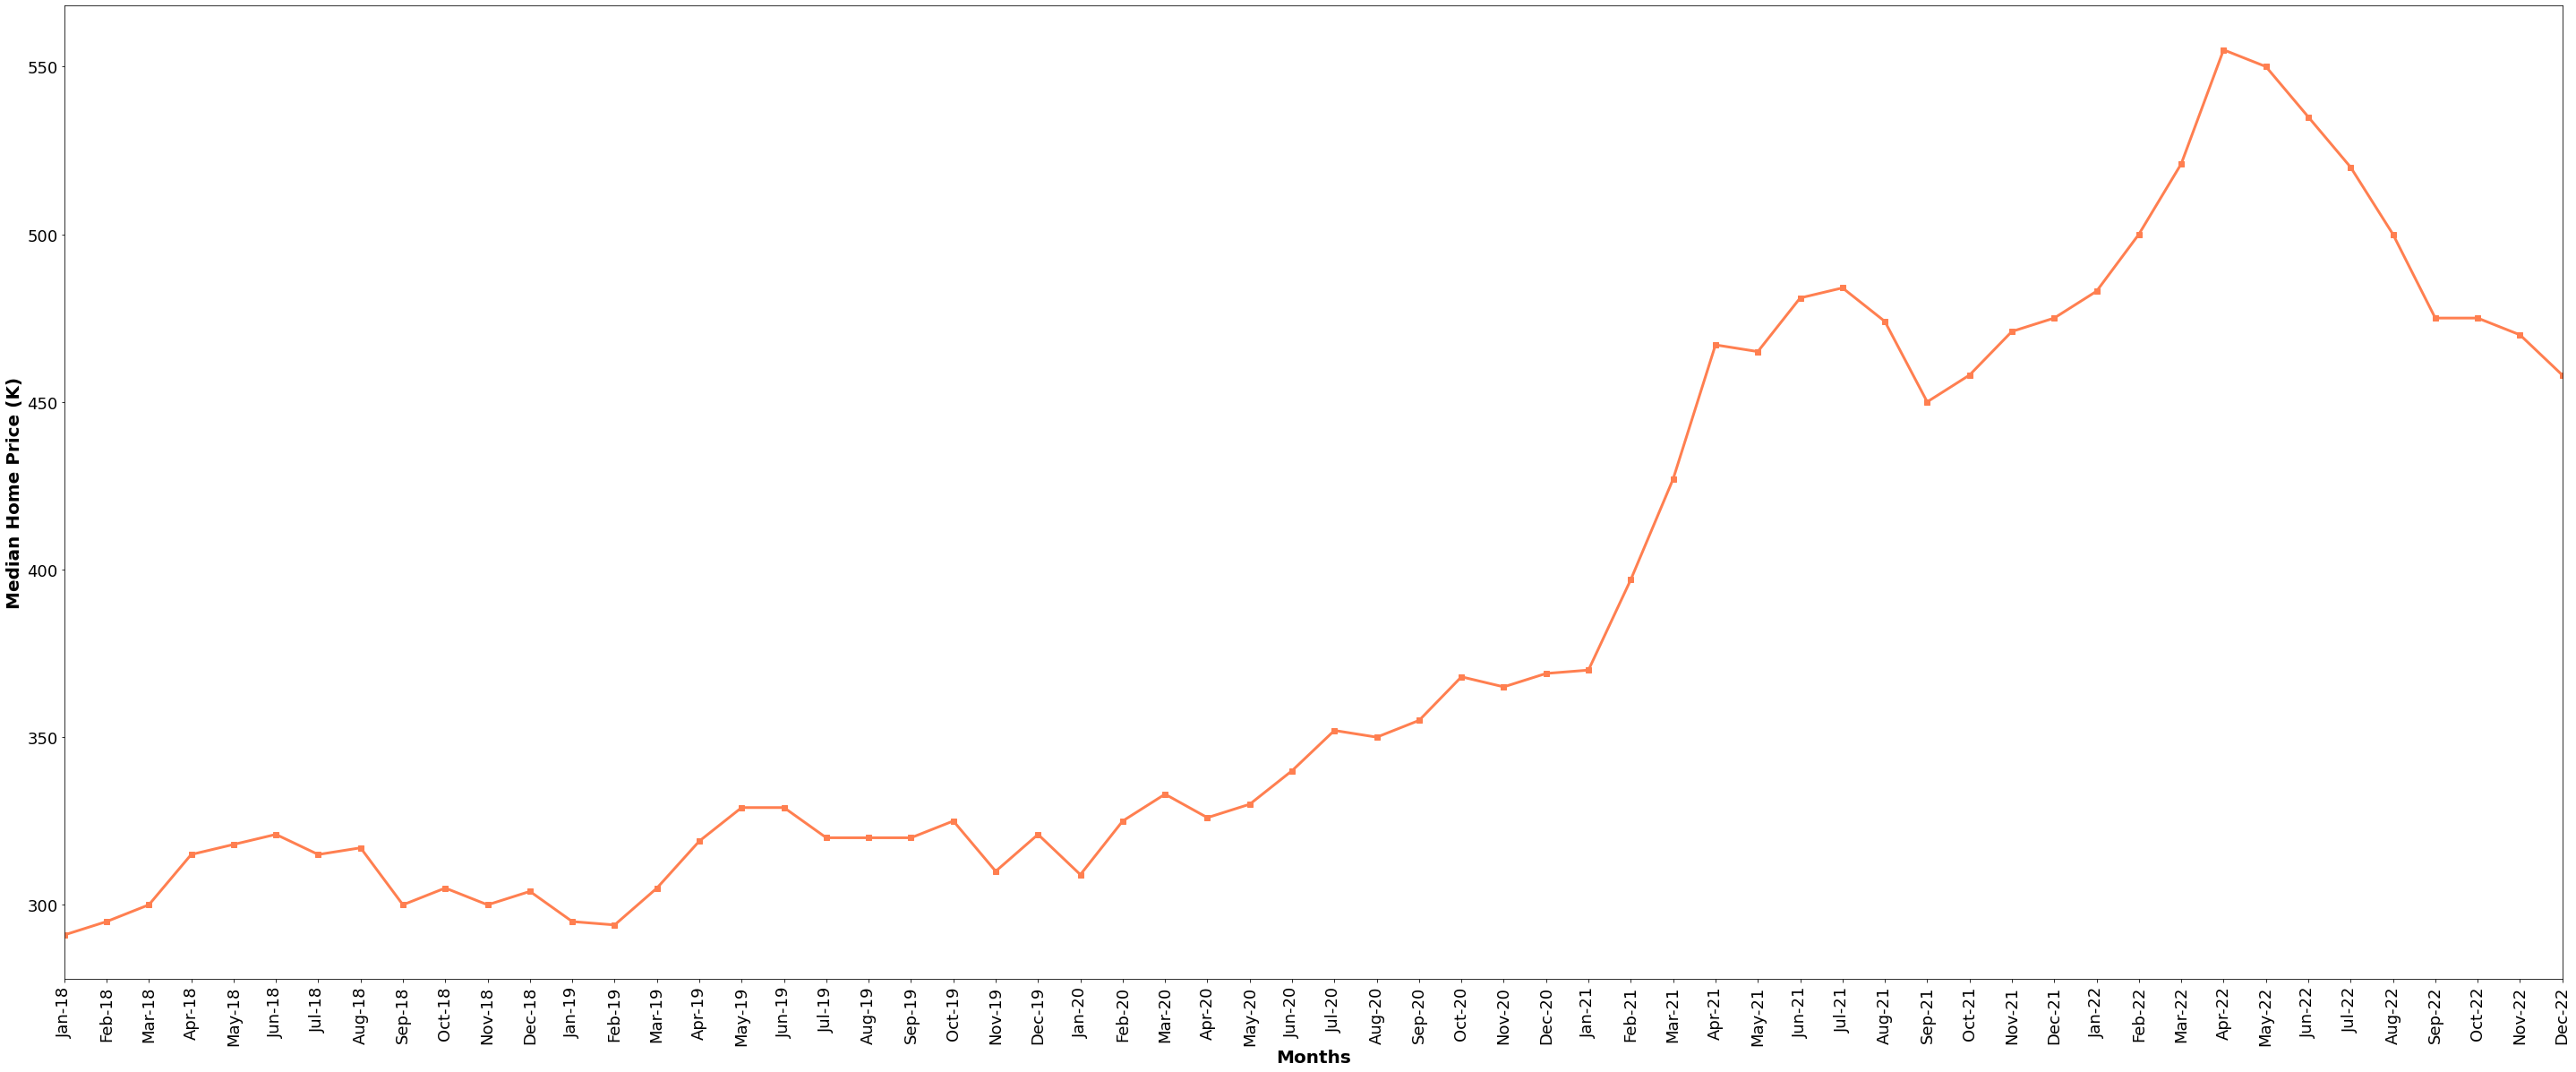

In [96]:
import matplotlib
plt.figure(figsize= (50,20))
plt.plot(austin_2018_2022["Month of Period End"], austin_2018_2022["Median Sale Price"], marker="s", linewidth=3, color= "coral")
plt.xticks(austin_2018_2022["Month of Period End"], rotation=90, fontsize= 18)
matplotlib.rc("ytick", labelsize=18)
plt.xlabel("Months", fontsize = 20, fontweight= "bold")
plt.ylabel("Median Home Price (K)", fontsize = 20, fontweight= "bold")
plt.xlim("Jan-18", "Dec-22")
plt.show()

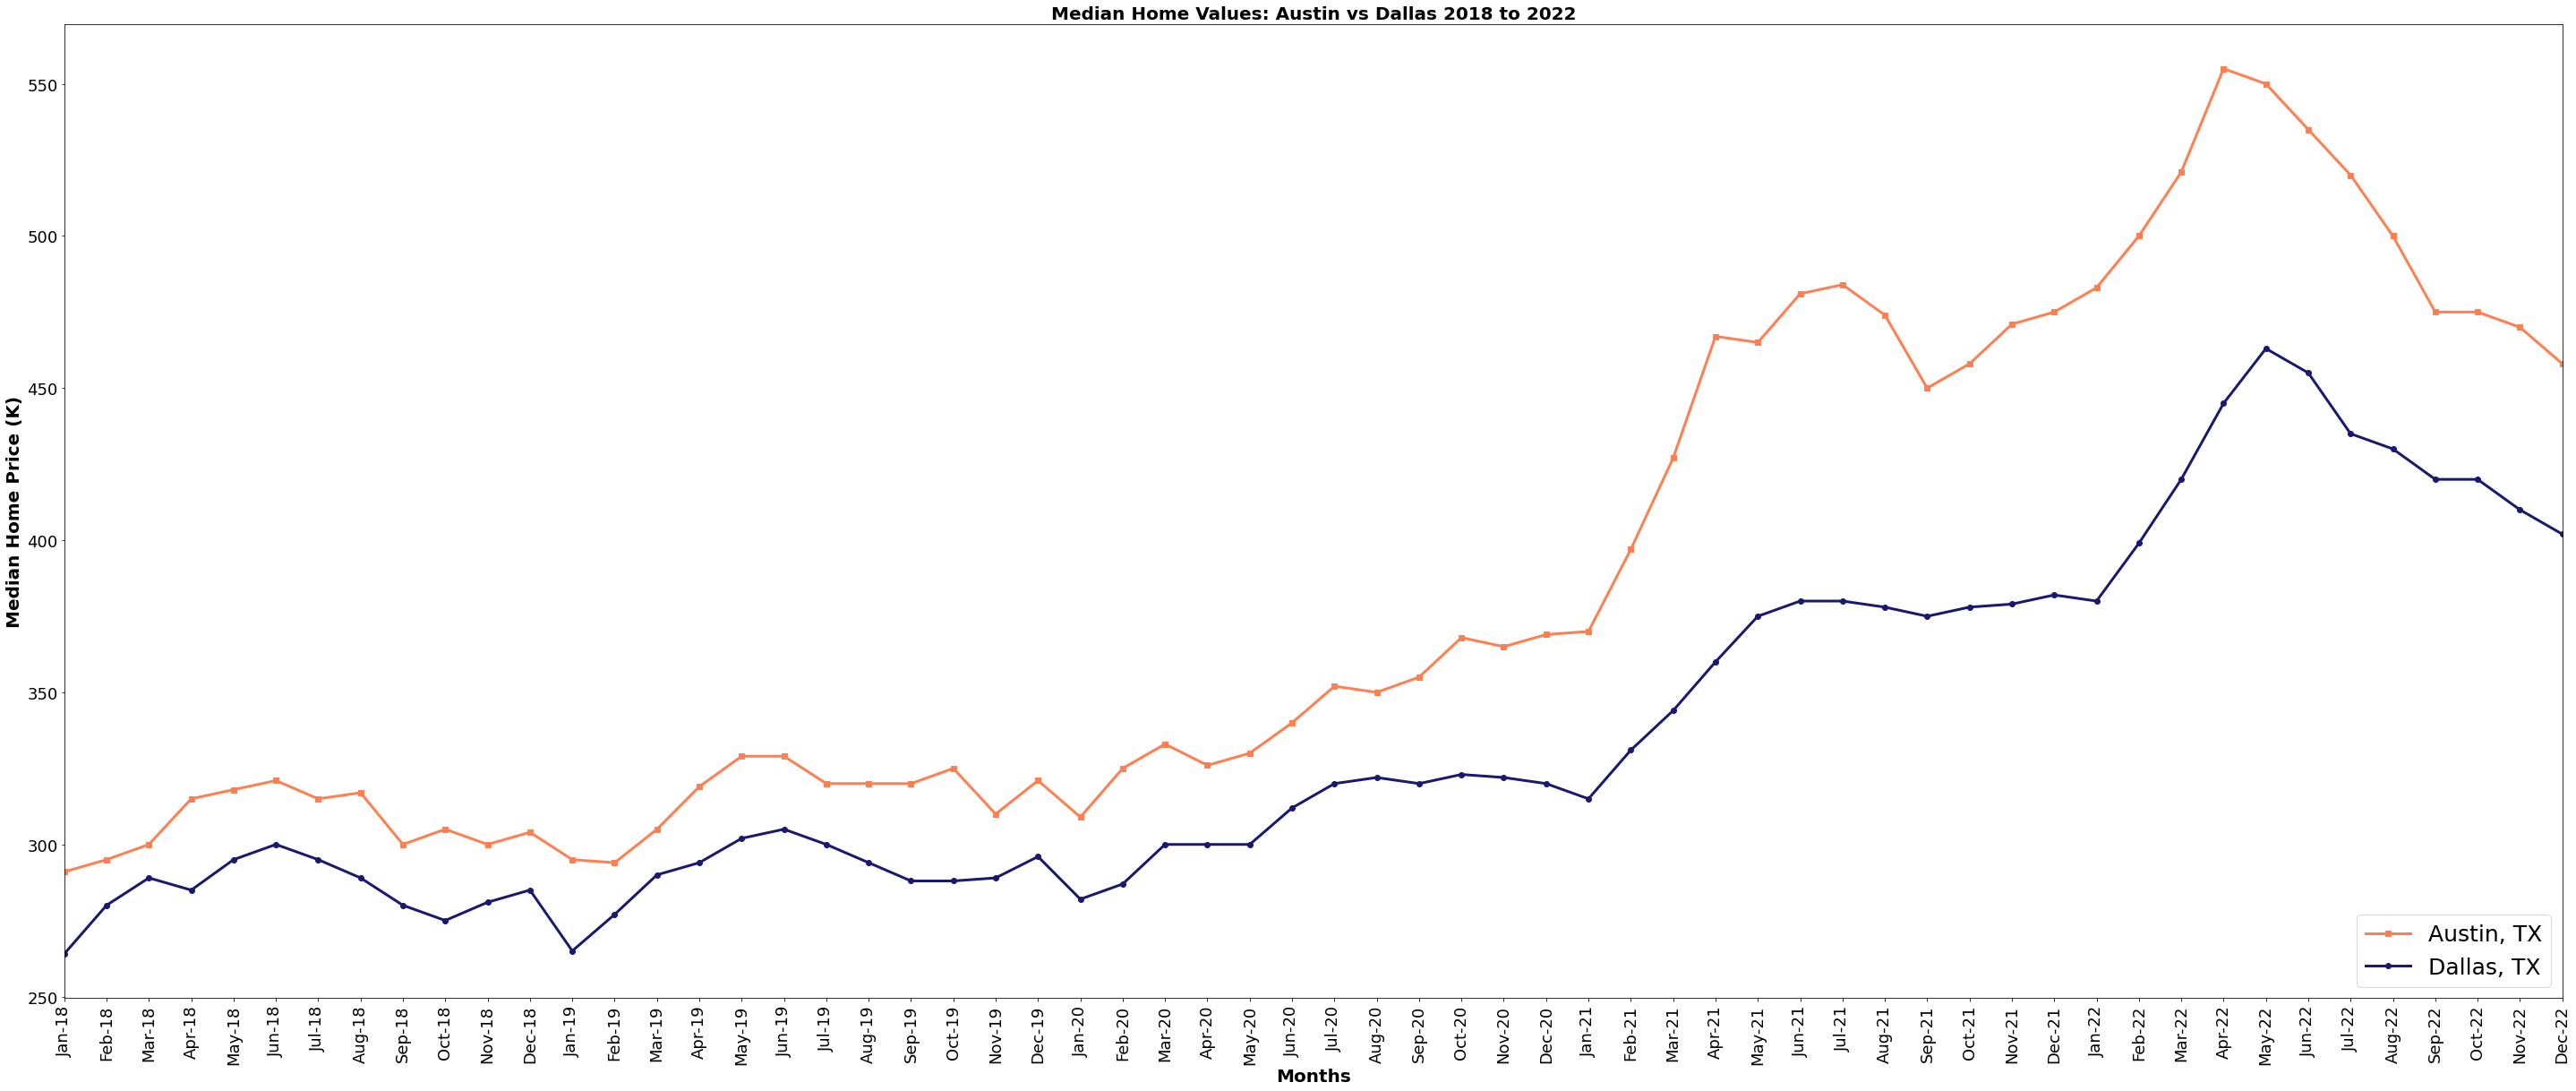

In [108]:

import matplotlib
plt.figure(figsize= (50,20))
plt.plot(austin_2018_2022["Month of Period End"], austin_2018_2022["Median Sale Price"], marker="s", linewidth=3, color= "coral", label= "Austin, TX")
plt.plot(dallas_2018_2022["Month of Period End"], dallas_2018_2022["Median Sale Price"], marker= "o", linewidth=3, color= "midnightblue", label= "Dallas, TX")
plt.xticks(austin_2018_2022["Month of Period End"], rotation=90, fontsize= 18)
matplotlib.rc("ytick", labelsize=18)
plt.xlabel("Months", fontsize = 20, fontweight= "bold")
plt.ylabel("Median Home Price (K)", fontsize = 20, fontweight= "bold")
plt.xlim("Jan-18", "Dec-22")
plt.legend(fontsize= "25", loc = "lower right")
plt.title("Median Home Values: Austin vs Dallas 2018 to 2022", fontsize=20, fontweight="bold")
plt.show()